In [32]:
# import required libraries for dataframe and visualization
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
# import required libraries for clustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')


In [33]:
data = pd.read_excel('Online Retail.xlsx')


Understand Data  

In [34]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [35]:
data.shape

(541909, 8)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [37]:
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Data Cleaning

In [38]:
data.drop_duplicates(inplace=True)

In [39]:
columns_to_drop = ['StockCode', 'Description', 'CustomerID','InvoiceDate']
data.drop(columns_to_drop, axis=1, inplace=True)

In [40]:
data.isna().sum()

InvoiceNo    0
Quantity     0
UnitPrice    0
Country      0
dtype: int64

In [41]:
data.shape

(536641, 4)

In [42]:
data.info

<bound method DataFrame.info of        InvoiceNo  Quantity  UnitPrice         Country
0         536365         6       2.55  United Kingdom
1         536365         6       3.39  United Kingdom
2         536365         8       2.75  United Kingdom
3         536365         6       3.39  United Kingdom
4         536365         6       3.39  United Kingdom
...          ...       ...        ...             ...
541904    581587        12       0.85          France
541905    581587         6       2.10          France
541906    581587         4       4.15          France
541907    581587         4       4.15          France
541908    581587         3       4.95          France

[536641 rows x 4 columns]>

In [43]:

data.describe()

,Quantity,UnitPrice
count,536641.000000,536641.000000
mean,9.620029,4.632656
std,219.130156,97.233118
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


<AxesSubplot: ylabel='Quantity'>

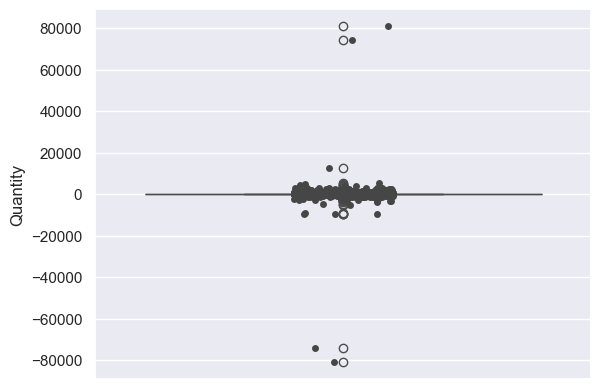

In [44]:

sns.boxplot( y='Quantity',data=data)
sns.stripplot(y='Quantity',data=data, color="#474646")

<AxesSubplot: ylabel='UnitPrice'>

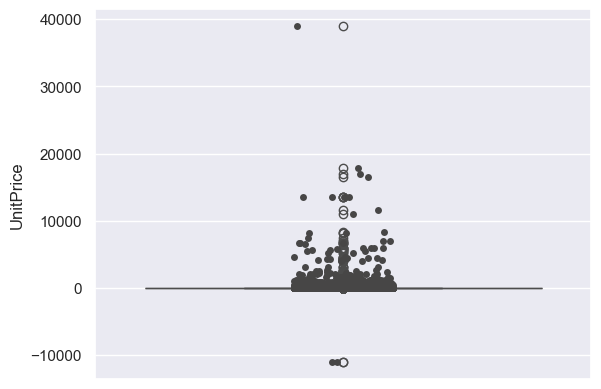

In [45]:
sns.boxplot( y='UnitPrice',data=data)
sns.stripplot(y='UnitPrice',data=data, color="#474646")

Remove outlier

In [46]:

# Calculate z-scores
z_scores = stats.zscore(data[['Quantity', 'UnitPrice']])

# Define a threshold for considering a point as an outlier
threshold = 3

# Create a boolean array indicating whether each data point is an outlier
outliers = (np.abs(z_scores) > threshold).any(axis=1)

# Remove outliers from the DataFrame
data = data[~outliers]
data = data[(data['Quantity'] >= 1) & (data['UnitPrice'] >= 1)]


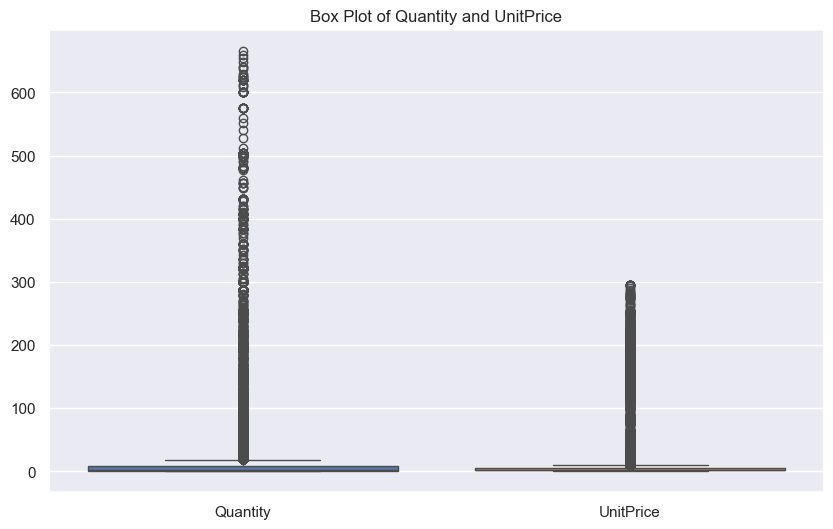

In [47]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['Quantity', 'UnitPrice']])
plt.title('Box Plot of Quantity and UnitPrice')
plt.show()


In [48]:
data.describe()

,Quantity,UnitPrice
count,414973.000000,414973.000000
mean,7.704947,4.253159
std,20.713866,7.821244
min,1.000000,1.000000
25%,1.000000,1.650000
50%,3.000000,2.890000
75%,8.000000,4.950000
max,666.000000,295.200000


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414973 entries, 0 to 541908
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   InvoiceNo  414973 non-null  object 
 1   Quantity   414973 non-null  int64  
 2   UnitPrice  414973 non-null  float64
 3   Country    414973 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 15.8+ MB


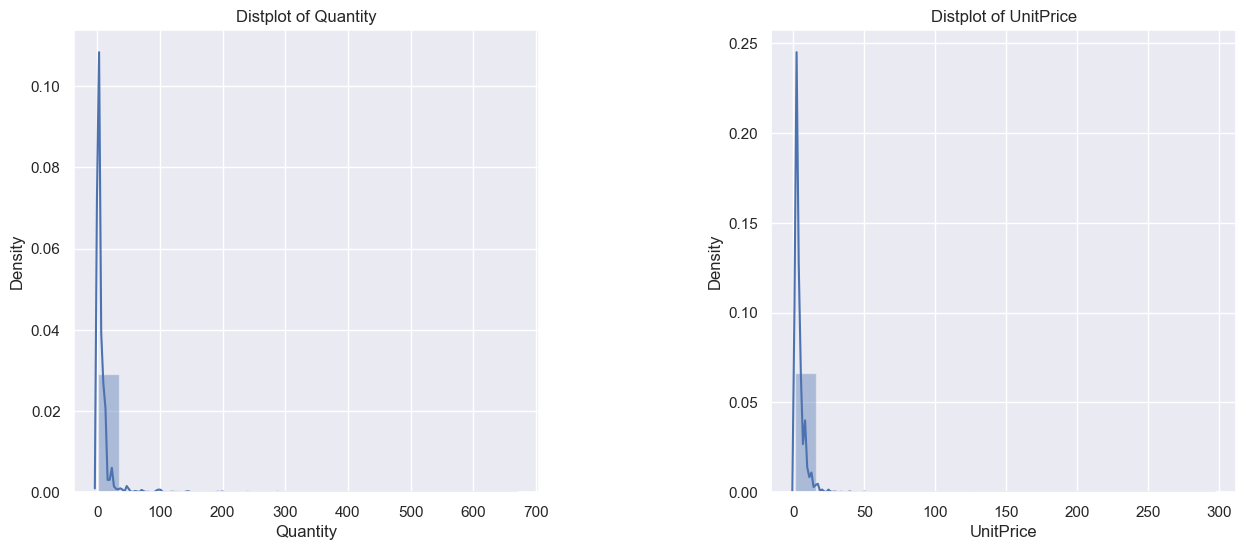

In [50]:
plt.figure(1,figsize=(15,6))
n=0
for x in ['Quantity', 'UnitPrice']:
    n+=1
    plt.subplot(1,2,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.distplot(data[x],bins=20)
    plt.title('Distplot of {}'.format(x))
plt.show()

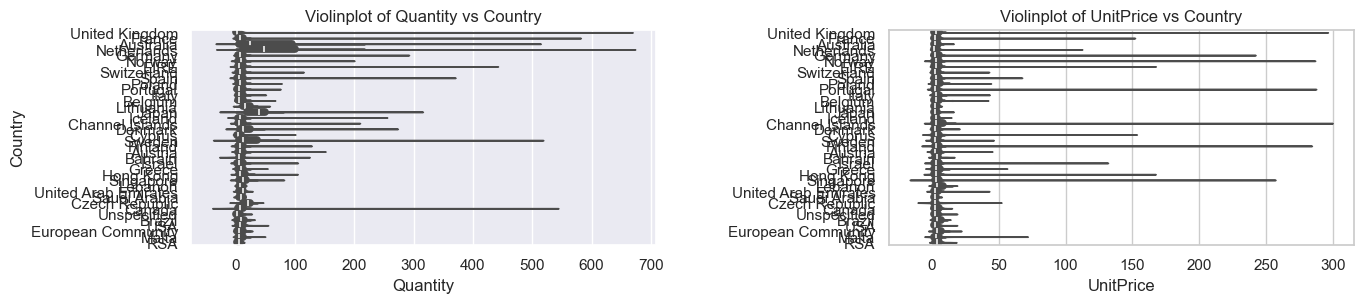

In [51]:
plt.figure(1,figsize=(15,7))
n=0
for cols in ['Quantity', 'UnitPrice']:
    n+=1
    plt.subplot(2,2,n)
    sns.set(style='whitegrid')
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.violinplot(x=cols,y='Country',data=data)
    plt.ylabel('Country' if n==1 else '')
    plt.title('Violinplot of {} vs Country'.format(cols))
plt.show()
    
   

<AxesSubplot: xlabel='Quantity', ylabel='UnitPrice'>

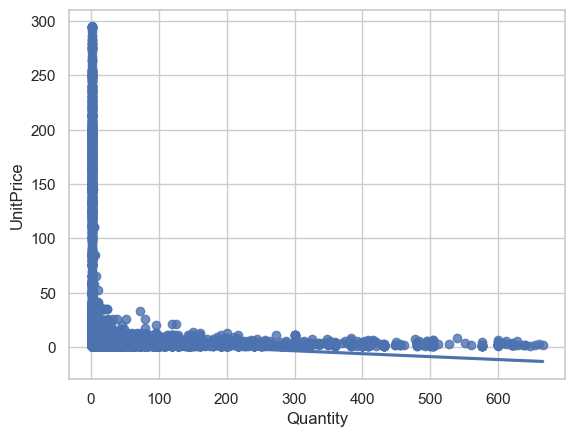

In [52]:
sns.regplot(x='Quantity',y='UnitPrice',data=data)

Build Model

First Model: K-Mean

In [53]:
# Select relevant features for clustering
features = data[['Quantity', 'UnitPrice']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42,n_init=10)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

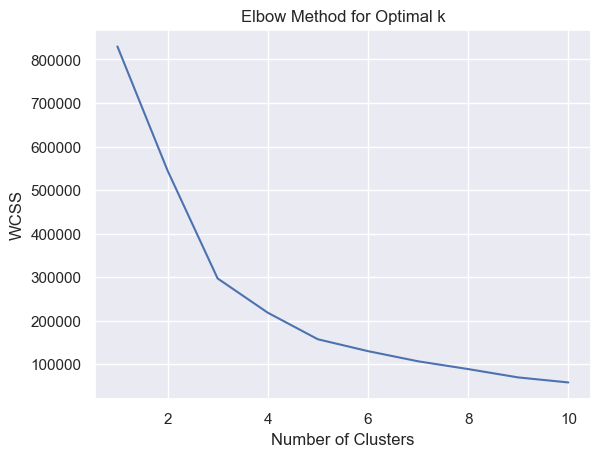

In [54]:
# Plot the Elbow Method graph
sns.set()
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  
plt.show()

In [55]:
# Choose the optimal number of clusters

k =5

# Apply k-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(features_scaled)

# # Calculate and display the silhouette score
# silhouette_avg = silhouette_score(features_scaled, data['Cluster'])
# print(f'Silhouette Score: {silhouette_avg}')

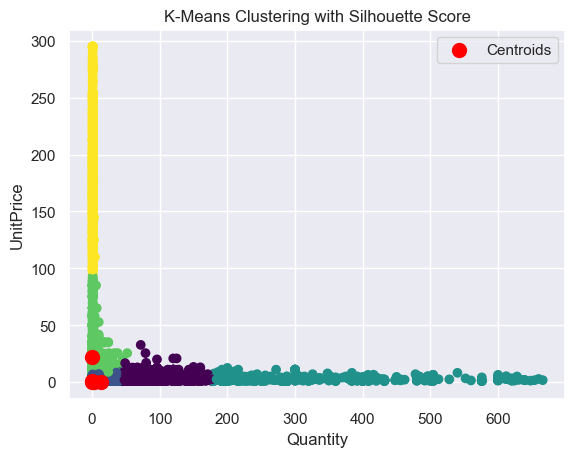

In [56]:
# Visualize the clusters
plt.scatter(data['Quantity'], data['UnitPrice'], c=data['Cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', label='Centroids')
plt.title('K-Means Clustering with Silhouette Score')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.legend()
plt.show()

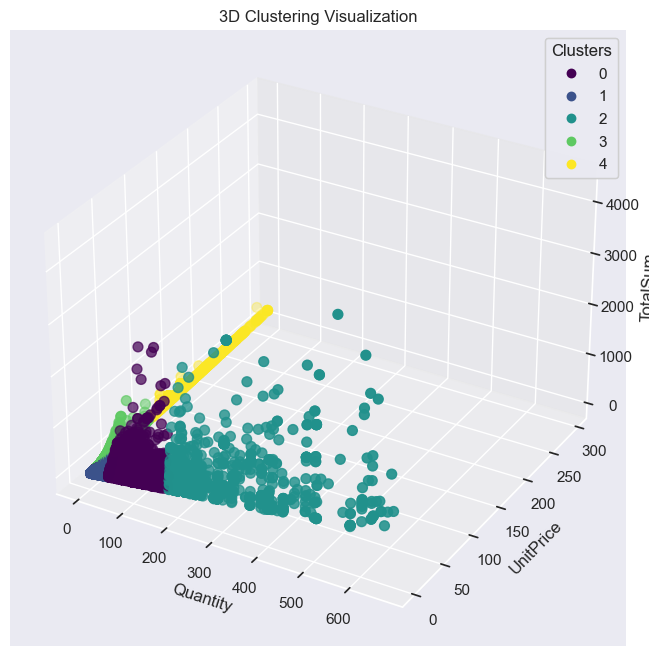

In [57]:



fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
# Calculate the total sum for each cluster
data['TotalSum'] = data['Quantity'] * data['UnitPrice']

# Scatter plot for Quantity, UnitPrice, and TotalSum with cluster labels
scatter = ax.scatter(data['Quantity'], data['UnitPrice'], data['TotalSum'], c=data['Cluster'], cmap='viridis', s=50)

# Add labels and title
ax.set_xlabel('Quantity')
ax.set_ylabel('UnitPrice')
ax.set_zlabel('TotalSum')
ax.set_title('3D Clustering Visualization')

# Add a legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()


Second Model: KNN Model

In [58]:
# Select the features and labels
features = data[['Quantity', 'UnitPrice',]]  
labels = data['Cluster']  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Standardize the features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  

# Train the model
knn_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# silhouette_avg_knn = silhouette_score(X_test_scaled, y_pred)
# print(f'Silhouette Score for KNN: {silhouette_avg_knn}')

# Display the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_report_str)


Accuracy: 1.00
Confusion Matrix:
[[ 1830     0     0     0     0]
 [    1 69112     0     1     0]
 [    0     0   249     0     0]
 [    1     1     0 11688     0]
 [    0     0     0     1   111]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1830
           1       1.00      1.00      1.00     69114
           2       1.00      1.00      1.00       249
           3       1.00      1.00      1.00     11690
           4       1.00      0.99      1.00       112

    accuracy                           1.00     82995
   macro avg       1.00      1.00      1.00     82995
weighted avg       1.00      1.00      1.00     82995



Third Model: Hierarchical Clustering

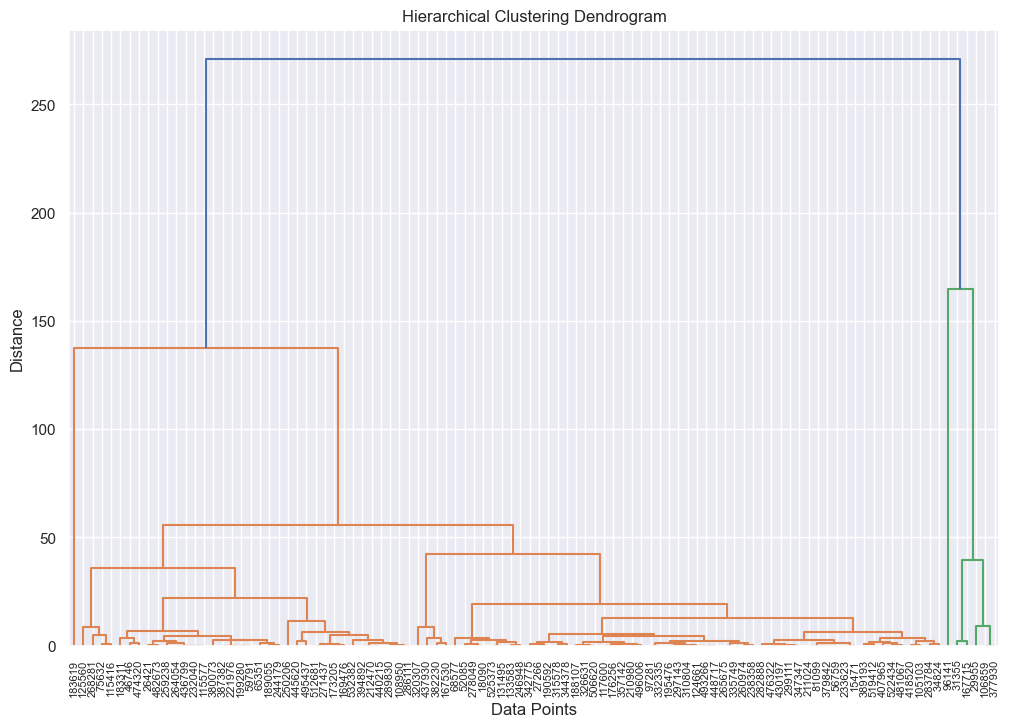

In [59]:
# Sample a subset of your data
data_sample = data.sample(n=100)  

# Select the features
features = data_sample[['Quantity', 'UnitPrice',]]  

# Perform hierarchical clustering
linkage_matrix = linkage(features, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=data_sample.index, leaf_rotation=90, leaf_font_size=8)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [60]:
from scipy.cluster.hierarchy import fcluster

# Set the threshold distance to cut the dendrogram
threshold_distance = 50  

# Assign clusters based on the threshold distance
clusters = fcluster(linkage_matrix, threshold_distance, criterion='distance')

# Add the cluster labels to your DataFrame
data_sample['Cluster'] = clusters


Fourth Model: Anomaly

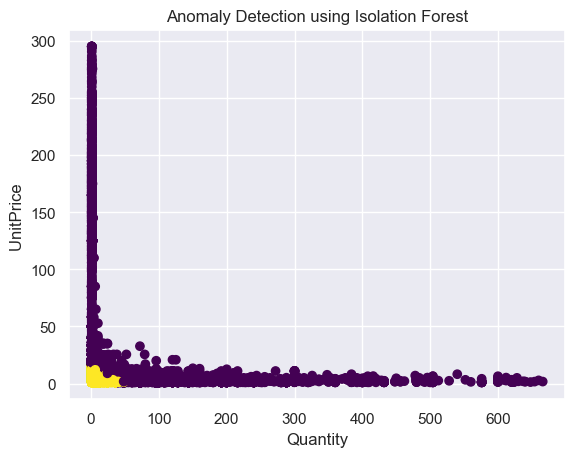

In [61]:
# Select the features
features = data[['Quantity', 'UnitPrice', ]]  

# Create an Isolation Forest model
isolation_forest = IsolationForest(contamination=0.05) 

# Fit the model to your data
isolation_forest.fit(features)

# Predict outliers (anomalies)
outliers = isolation_forest.predict(features)

# Add a column to your DataFrame indicating whether each data point is an anomaly
data['IsAnomaly'] = outliers

# Visualize the anomalies (scatter plot of two features)
plt.scatter(features.iloc[:, 0], features.iloc[:, 1], c=data['IsAnomaly'], cmap='viridis')
plt.title('Anomaly Detection using Isolation Forest')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice ')
plt.show()


 pipeline 
 هعملها هنا عشان الفوق ميبوظش 
 

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import IsolationForest
from scipy import stats

# Function to load data
def load_data(file_path):
    return pd.read_excel(file_path)

# Function for data preprocessing
def preprocess_data(data):
    # Drop duplicates and columns
    data.drop_duplicates(inplace=True)
    columns_to_drop = ['StockCode', 'Description', 'CustomerID', 'InvoiceDate']
    data.drop(columns=columns_to_drop, axis=1, inplace=True)

    # Remove outliers
    z_scores = stats.zscore(data[['Quantity', 'UnitPrice']])
    threshold = 3
    outliers = (np.abs(z_scores) > threshold).any(axis=1)
    data = data[~outliers]
    data = data[(data['Quantity'] >= 1) & (data['UnitPrice'] >= 1)]

    return data

# Function for data visualization
def visualize_data(data):
    # Your visualization code here
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data[['Quantity', 'UnitPrice']])
    plt.title('Box Plot of Quantity and UnitPrice')
    plt.show()

    # More visualizations as needed...

# Function for K-Means clustering
def kmeans_clustering(data):
    # Select relevant features for clustering
    features = data[['Quantity', 'UnitPrice']]

    # Standardize the features
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    # Determine the optimal number of clusters using the Elbow Method
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
        kmeans.fit(features_scaled)
        wcss.append(kmeans.inertia_)

    # Plot the Elbow Method graph
    sns.set()
    plt.plot(range(1, 11), wcss)
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.show()

    # Choose the optimal number of clusters
    k = 5

    # Apply k-means clustering with the chosen number of clusters
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    data['Cluster'] = kmeans.fit_predict(features_scaled)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(features_scaled, data['Cluster'])
    print(f'Silhouette Score: {silhouette_avg}')

    # Visualize the clusters
    plt.scatter(data['Quantity'], data['UnitPrice'], c=data['Cluster'], cmap='viridis')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', label='Centroids')
    plt.title('K-Means Clustering with Silhouette Score')
    plt.xlabel('Quantity')
    plt.ylabel('UnitPrice')
    plt.legend()
    plt.show()

    return data

# Function for KNN classification
def knn_classification(features, labels):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

    # Standardize the features (important for KNN)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create a KNN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=5)

    # Train the model
    knn_classifier.fit(X_train_scaled, y_train)

    # Make predictions on the test set
    y_pred = knn_classifier.predict(X_test_scaled)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_report_str = classification_report(y_test, y_pred)

    # Display the evaluation metrics
    print(f"Accuracy: {accuracy:.2f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(classification_report_str)

# Function for hierarchical clustering
def hierarchical_clustering(features):
    # Perform hierarchical clustering
    linkage_matrix = linkage(features, method='ward')

    # Plot the dendrogram
    plt.figure(figsize=(12, 8))
    dendrogram(linkage_matrix, labels=features.index, leaf_rotation=90, leaf_font_size=8)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Data Points')
    plt.ylabel('Distance')
    plt.show()

# Function for isolation forest
def isolation_forest(features):
    # Create an Isolation Forest model
    isolation_forest_model = IsolationForest(contamination=0.05)

    # Fit the model to your data
    isolation_forest_model.fit(features)

    # Predict outliers (anomalies)
    outliers = isolation_forest_model.predict(features)

    # Add a column to your DataFrame indicating whether each data point is an anomaly
    data['IsAnomaly'] = outliers

    # Visualize the anomalies (scatter plot of two features)
    plt.scatter(features.iloc[:, 0], features.iloc[:, 1], c=data['IsAnomaly'], cmap='viridis')
    plt.title('Anomaly Detection using Isolation Forest')
    plt.xlabel('Quantity')
    plt.ylabel('UnitPrice ')
    plt.show()

# Main pipeline
file_path = 'Online Retail.xlsx'
data = load_data(file_path)
processed_data = preprocess_data(data)
visualize_data(processed_data)
clustered_data = kmeans_clustering(processed_data[['Quantity', 'UnitPrice']])
knn_classification(clustered_data[['Quantity', 'UnitPrice']], clustered_data['Cluster'])
hierarchical_clustering(processed_data[['Quantity', 'UnitPrice']])
isolation_forest(processed_data[['Quantity', 'UnitPrice']])
